# Trailer: bio-image analysis, machine learning and bio-statistics with python
During this semester we will dive into image analysis, machine learning and bio-statistics with python. This notebook serves as a trailer of what we will be doing until July. Every step will be explained in detail in future sessions. This is just a trailer.

What typically comes first in Python Juptyer notebooks is a block of import statements. By executing it, we can make sure that everything we need is installed.

In [1]:
from skimage.io import imread, imshow
from csbdeep.utils import normalize
from stardist.models import StarDist2D 
from skimage import measure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

## Python basics
Python is a functional programming language. It allows writing procedures for processing scientific data. Learning the basics are crucial for understanding advanced data analysis procedures.

In [2]:
a = 1
b = 2

In [3]:
a + b

3

In [4]:
measurements = [56.2, 21.4, 48.3, 35.2, 11.2]

for m in measurements:
    print(m)

56.2
21.4
48.3
35.2
11.2


## Working with image data
We can load images into variables. The path "../data/blobs.tif" suggests, that from the current directory, where this notebook is saved, we need to go one folder up ("..") and there should be a "data" folder in which "blobs.tif" is stored.

In [5]:
# open an image file
image = imread("../data/blobs.tif")

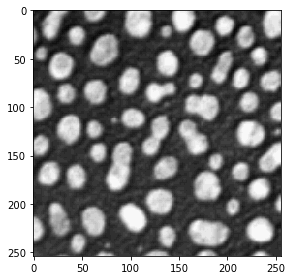

In [6]:
# visualizing an image
imshow(image)

## Image segmentation
There is an endless number of image segmentation techniques published. Current state-of-the-art segmentation algorithms for segmenting bright blobs in microscopy images use deep learning techniques. Here we demonstrate [StarDist](https://github.com/stardist/stardist).

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


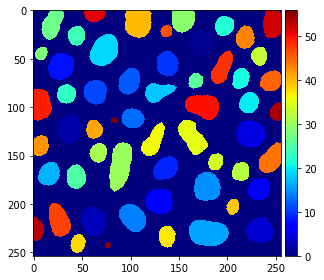

In [7]:
# normalize image
normalized_image = normalize(image, 1,99.8, axis=(0,1))

# load pretrained deep-learning model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

# predict labels
label_image, details = model.predict_instances(normalized_image)
imshow(label_image, cmap="jet")

## Measurements and feature extraction
From segmented images we can derive quantitative measurements. The process is called "featue extraction".

In [8]:
# analyse objects
table = measure.regionprops_table(label_image, intensity_image=image,
                                  properties=('label', 'area', 'centroid', 'mean_intensity', 'feret_diameter_max'))

## Working with tables

In [9]:
# show table
dataframe = pd.DataFrame(table)
dataframe

,label,area,centroid-0,centroid-1,mean_intensity,feret_diameter_max
0,1,564,33.423759,174.085106,179.843972,28.792360
1,2,584,122.337329,37.251712,192.534247,31.048349
2,3,579,217.272884,62.056995,184.110535,31.622777
3,4,589,227.169779,234.027165,211.286927,29.832868
4,5,625,127.454400,224.120000,205.542400,30.463092
5,6,430,184.234884,233.339535,196.279070,26.419690
6,7,606,197.270627,130.303630,196.858086,29.614186
7,8,574,57.534843,28.611498,185.839721,29.546573
8,9,485,163.105155,136.659794,168.461856,29.681644
9,10,486,54.831276,138.421811,201.448560,28.284271


## Statistical analysis

In [10]:
print("Mean blob area is ", np.mean(dataframe['area']))

Mean blob area is  427.60714285714283


## Data visualization
For understanding realationships between object properties, plotting is a commonly used technique. Here we plot area versus elongation of objects.

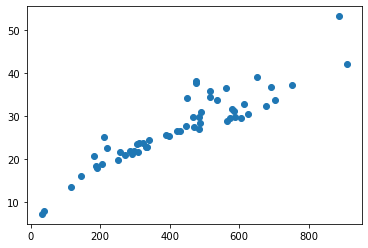

In [11]:
plt.scatter(dataframe['area'], dataframe['feret_diameter_max'])

Parametric maps allow us to visualize properties of objects in image space. In the following example, elongate objects are brighter than roundish objects.

matplotlib_plugin.py (150): Float image out of standard range; displaying image with stretched contrast.


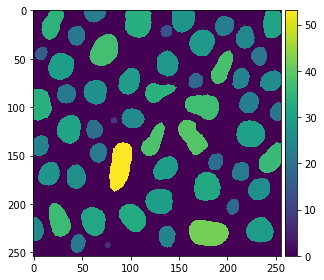

In [12]:
parametric_map = cle.replace_intensities(label_image, np.asarray([0] + list(dataframe['feret_diameter_max'])))
imshow(parametric_map)